# PAUTA Control Aprendizaje No Supervisado

*Al finalizar, subir el notebook desarrollado a siveducMD*

**1.** Describa en qué consiste el análisis de componentes principales incluyendo las propiedades que cumplen las dos primeras componentes principales y su proyección de los datos en ellas. Explique bajo que circunstancias es necesario considerar la 3era y 4ta componentes principales. Indique las aplicaciones más comunes del PCA.

**Respuesta**

El análisis de componentes principales (PCA) es el proceso mediante el cual se define una proyección de los datos originales multidimensionales en un espacio de dimensión menor, habitualmente 2, el llamado plano principal. Para ello, mediante propiedades geométricas, se calcula la proyección que maximiza la varianza empirica de los datos en direcciones ortogonales. Específicamente, el primer eje principal, es la proyección definida por el vector propio de la matriz de covarianza de los datos centrados correspondiente al mayor valor propio. El segundo eje principal, corresponde al vector propio de dicha matriz correspondiente a su segundo mayor valor propio. 

Si el porcentaje de varianza explicado por las dos primeras componentes principales es bajo, por ejemplo menos del 50%, entonces es necesario recurrir a la visualización de la proyección de los datos en el tercer y cuarto eje principal para tener una mirada mas completa de los datos.

El PCA es un tipo de aprendizaje supervisado y sus principales aplicaciones son 
i) el análisis exploratorio de datos, como una primera herramienta de visualización de datos para reducir el número de variables y evitar la multicolinealidad, o cuando se tienen demasiados predictores en relación con el número de observaciones.
ii) en la reducción de la dimensionalidad de los datos
iii) en tareas de visualización de otros análisis, como por ejemplo clustering. 




**2.** Escoja uno de los algoritmos de agrupamiento que hemos estudiado, realice una breve descripción del algoritmo y detalle ventajas, desventajas y ejemplos de aplicación.



<table>
    <tr> <td></td>
<td> KMeans </td> <td> GMM </td> <td> Jerárquico </td> <td> SOM </td>
</tr>
<tr>
    <td> Descripción </td> <td> Dado un número de grupos definidos por el usuario, este algoritmo define los grupos de manera de minimizar la suma de las distancias al cuadrado  de cada observación al centroide de su grupo. El algoritmo iterativo puede alcanzar un mínimo local por lo que se consideran mas de un valor inicial para la ubicación de los centroides.  Se asegura convergencia por tratarse de un número finito de posibilidades. </td> 
<td> Este modelo supone que los datos provienen de un proceso generador de datos del tipo Mezcla de Gaussianas, en que cada grupo corresponde a una ditrsibución Gaussiana distinta. Se asume que existe una variable latente que indica el grupo a que pertenece cada observación. Se utiliza el algoritmo EM para obtener un agrupamiento óptimo </td> 
<td> Se trata de un proceso iterativo en que se van agrupando observaciones (aglomerativo) o diviendo grupos (divisivo) de acuerdo a la distancia entre grupos. Se definen distintas distancias entre grupos: single linkage, complete o distancia promedio</td> 
<td> Los mapas auto-organizados o SOM permiten representar datos multidimensionales en espacios de menor dimensión (habitualmente 2). Consiste en una red neuronal de dos capas, en que la capa de salida se denomina mapa característico. Los pesos entre capas se ajustan de manera que las observaciones similares activan los mismos nodos en el mapa característico.  Se caracterizan por conservar las relaciones topológicas dentro de los datos de entrenamiento </td> 
</tr>
<tr>
    <td> Ventajas </td>
    <td> Es un método heurístico que no tiene supuestos sobre la naturaleza de los datos </td>
<td> Permite grupos no esféricos y es robusto </td> 
<td> No requiere definir un número de grupos a priori, se pueden utilizar distintas distancias</td> 
<td> No es sensible a ruido en los datos. Algoritmo de entrenamiento de poca complejidad </td> 
</tr>   
<tr>
    <td> Desventajas </td>
    <td> Sensibilidad a valores extremos, grupos esféricos</td>
<td> Requiere probar hipótesis de normalidad en los datos </td> 
<td> Es costoso computacionalmente. La visualización para grandes volúmenes de datos no es apropiada </td> 
<td> Puede ser costoso computacionalmente si se define un radio de activación inicial muy grande. No es adecuado con datos muy dispersos.</td> 
</tr>      
<tr>
    <td> Ejemplos de Aplicación </td>
    <td> segmentación de datos, compresión de imágenes </td>
<td> Datos que pueden ser asociados a distribuciones gaussianas. Datos que consideran ruido tales como datos de fallas geológicas, clima, astronomía, etc. </td> 
<td> propósito general, bioinformática</td> 
<td> reconocimiento de voz, compresion de imágenes </td> 
</tr>      
</table>


**Parte práctica:** 
Considere los datos adjuntos provenientes de una muestra de canciones de spotify, recolectadas por kaggle.com, que incluye para cada canción 11 características (columnas 4 a la 14). Se trata de analizar si tales características permiten agrupar las canciones según género.  

Entre las características disponibles hay algunas que son calculadas por el propio algoritmo de Spotify, y por lo tanto, tienen cierto grado de subjetividad, como son: **acousticness, danceability, energy, instrumentalness, liveness, speechiness y valence**. 

Por otra parte hay otras variables objetivas como **duration_ms, tempo y  loudness**. Son atributos de una canción que no están sujetos a interpretación del algoritmo. Por ejemplo, la duración es la que tenga la pista y el tempo será el que determine un metrónomo.

Por último se consigna la variable **popularity**, cuyo valor  está basado en datos reales de reproducción, pero ponderada por la cercanía en el tiempo (reproducciones más recientes tienen mayor peso a la hora de calcular la popularidad).

En este control se trata de determinar si las características aquí descritas permiten agrupar adecuadamente las canciones de acuerdo al género a la que pertenecen (primera columna de los datos)



**3.** Realice un análisis exploratorio de los datos de las 11 características de las canciones (columnas 4 a la 14). Interprete sus resultados.
    
**4.** Escoja un método de agrupamiento que estime es adecuado para tratar estos datos. Justifique su elección y desarrolle los agrupamientos correspondientes. Justifique los valores de los parámetros utilizados. Itere si es necesario.
    
**5.** Grafique sus resultados utilizando una proyección de los datos en el primer plano de componentes principales. Interprete sus resultados.

**6. La medida Purity** 

Esta es una medida útil para cuantificar la calidad del agrupamiento cuando se conoce la clase de cada observación.

Sea $N_{ij}$ el número de observaciones en el cluster $i$ que pertenecen a la clase $j$ y $N_i = \sum_{j=1}^{C} N_{ij}$  el número total de elementos del cluster $i$. Se define $p_{ij} = \frac{N_{ij}}{N_i}$ la probabilidad empírica de la clase $j$ en el cluster $i$. Se denomina **Purity** del cluster $i$ a:
$$p_i = \max_{j= 1,\cdots, C} p_{ij}$$
y la **Purity** del agrupamiento completo:
$$\text{Purity} = \sum_{i} \frac{N_i}{N} p_i$$
El rango de Purity es $[0,1]$ y cuanto mas cercano a $1$ es mejor el agrupamiento (mas cercano a las clases).

Utilice la medida Purity para establecer la calidad del agrupamiento. Realice una conclusión general de sus resultados.

 


         genre                       artist_name
100 Electronic                         Morcheeba
101 Electronic                     Dodge & Fuski
102 Electronic                            Bjarki
103 Electronic                      Flying Lotus
104 Electronic                            Getter
105 Electronic                          Herobust
106 Electronic                      Flying Lotus
107 Electronic                        Thom Yorke
108 Electronic                              Lamb
109 Electronic                        Wax Tailor
110 Electronic                      Juno Reactor
111       Rock                      Bobby Vinton
112       Rock                           Hammock
113       Rock                      Led Zeppelin
114       Rock                   Nine Inch Nails
115       Rock                     Grateful Dead
116       Rock                     Grateful Dead
117       Rock            Dashboard Confessional
118       Rock  Better Oblivion Community Center
119       Rock      

   popularity     acousticness       danceability     duration_ms    
 Min.   : 0.00   Min.   :0.000051   Min.   :0.0685   Min.   : 31787  
 1st Qu.:29.00   1st Qu.:0.175000   1st Qu.:0.2570   1st Qu.:141787  
 Median :41.00   Median :0.816000   Median :0.3770   Median :210960  
 Mean   :38.83   Mean   :0.609778   Mean   :0.3926   Mean   :219232  
 3rd Qu.:53.00   3rd Qu.:0.983000   3rd Qu.:0.5040   3rd Qu.:262773  
 Max.   :74.00   Max.   :0.996000   Max.   :0.8650   Max.   :865940  
     energy        instrumentalness     liveness         loudness      
 Min.   :0.00211   Min.   :0.00000   Min.   :0.0504   Min.   :-46.122  
 1st Qu.:0.07260   1st Qu.:0.00315   1st Qu.:0.0995   1st Qu.:-24.606  
 Median :0.25500   Median :0.47500   Median :0.1150   Median :-14.592  
 Mean   :0.35131   Mean   :0.45033   Mean   :0.1789   Mean   :-17.134  
 3rd Qu.:0.59700   3rd Qu.:0.89300   3rd Qu.:0.1570   3rd Qu.: -9.127  
 Max.   :0.97700   Max.   :0.95800   Max.   :0.9720   Max.   : -0.747  
  spee

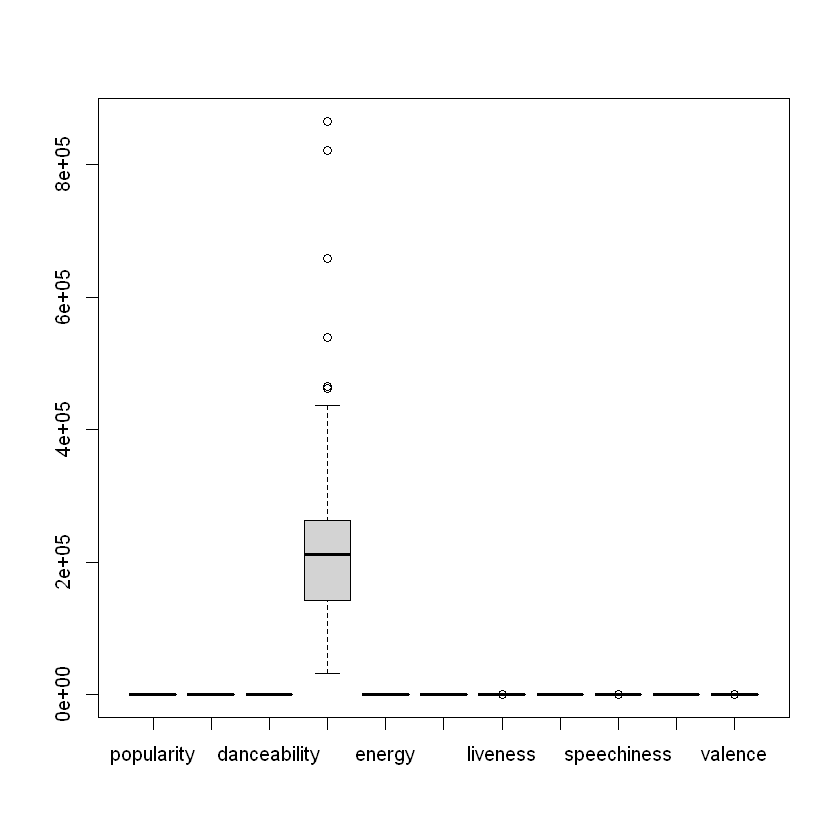

In [5]:
library(cluster)
library(ggplot2)
datos0 <-read.csv("tiposMusica.csv",header=TRUE,sep=";")
print(datos0[100:149,])
summary(datos0[,4:14])
boxplot(datos0[,4:14])


In [4]:
table(datos0[,1])


 Classical Electronic       Rock 
        71         39         39 

In [11]:
var(datos0[,4:14])

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,3.554919e+02,-2.287354e+00,2.017702e-01,3.025814e+05,1.248888e+00,-1.621930e+00,-5.732073e-02,3.948529e+01,-5.103314e-02,8.451235e+00,-1.647539e-01
acousticness,-2.287354e+00,1.645395e-01,-2.621134e-02,-3.212228e+03,-1.050205e-01,7.027894e-02,-1.728978e-02,-3.095844e+00,9.715548e-04,5.408675e-01,2.125601e-03
danceability,2.017702e-01,-2.621134e-02,3.164554e-02,-1.134818e+03,2.112165e-02,-1.636660e-02,-1.219508e-03,7.064394e-01,-5.275856e-04,-1.700972e-02,7.462093e-03
duration_ms,3.025814e+05,-3.212228e+03,-1.134818e+03,1.665968e+10,1.819417e+03,2.940834e+03,-9.998337e+00,1.101093e+05,1.301129e+02,-3.197327e+05,-2.915821e+03
energy,1.248888e+00,-1.050205e-01,2.112165e-02,1.819417e+03,9.100875e-02,-4.133822e-02,1.356091e-02,2.527274e+00,-4.178903e-04,-2.391653e-01,-3.102556e-03
instrumentalness,-1.621930e+00,7.027894e-02,-1.636660e-02,2.940834e+03,-4.133822e-02,1.612471e-01,-1.951955e-02,-2.100616e+00,1.168707e-03,1.077099e+00,-1.964818e-02
liveness,-5.732073e-02,-1.728978e-02,-1.219508e-03,-9.998337e+00,1.356091e-02,-1.951955e-02,2.665673e-02,4.226818e-01,-5.583587e-05,-1.375505e-01,3.289024e-03
loudness,3.948529e+01,-3.095844e+00,7.064394e-01,1.101093e+05,2.527274e+00,-2.100616e+00,4.226818e-01,1.023674e+02,-7.045687e-03,-2.573517e+00,1.922829e-02
speechiness,-5.103314e-02,9.715548e-04,-5.275856e-04,1.301129e+02,-4.178903e-04,1.168707e-03,-5.583587e-05,-7.045687e-03,1.185599e-03,2.020283e-01,8.146248e-04
tempo,8.451235e+00,5.408675e-01,-1.700972e-02,-3.197327e+05,-2.391653e-01,1.077099e+00,-1.375505e-01,-2.573517e+00,2.020283e-01,7.236191e+02,6.593909e-01


In [20]:
#implementación de Purity
ClusterPurity <- function(clusters, classes) {
  sum(apply(table(classes, clusters), 2, max)) / length(clusters)
}

In [6]:
datos<- scale(datos0[,4:14])
summary(datos)

   popularity       acousticness      danceability       duration_ms      
 Min.   :-2.0596   Min.   :-1.5031   Min.   :-1.82162   Min.   :-1.45224  
 1st Qu.:-0.5215   1st Qu.:-1.0718   1st Qu.:-0.76199   1st Qu.:-0.60001  
 Median : 0.1150   Median : 0.5084   Median :-0.08742   Median :-0.06408  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.7514   3rd Qu.: 0.9201   3rd Qu.: 0.62649   3rd Qu.: 0.33734  
 Max.   : 1.8652   Max.   : 0.9521   Max.   : 2.65582   Max.   : 5.01043  
     energy        instrumentalness      liveness          loudness      
 Min.   :-1.1575   Min.   :-1.12148   Min.   :-0.7870   Min.   :-2.8650  
 1st Qu.:-0.9239   1st Qu.:-1.11363   1st Qu.:-0.4863   1st Qu.:-0.7385  
 Median :-0.3193   Median : 0.06142   Median :-0.3913   Median : 0.2513  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.8144   3rd Qu.: 1.10237   3rd Qu.:-0.1341   3rd Qu.: 0.7914  
 Max.   : 2.0740   Max.   : 1.2

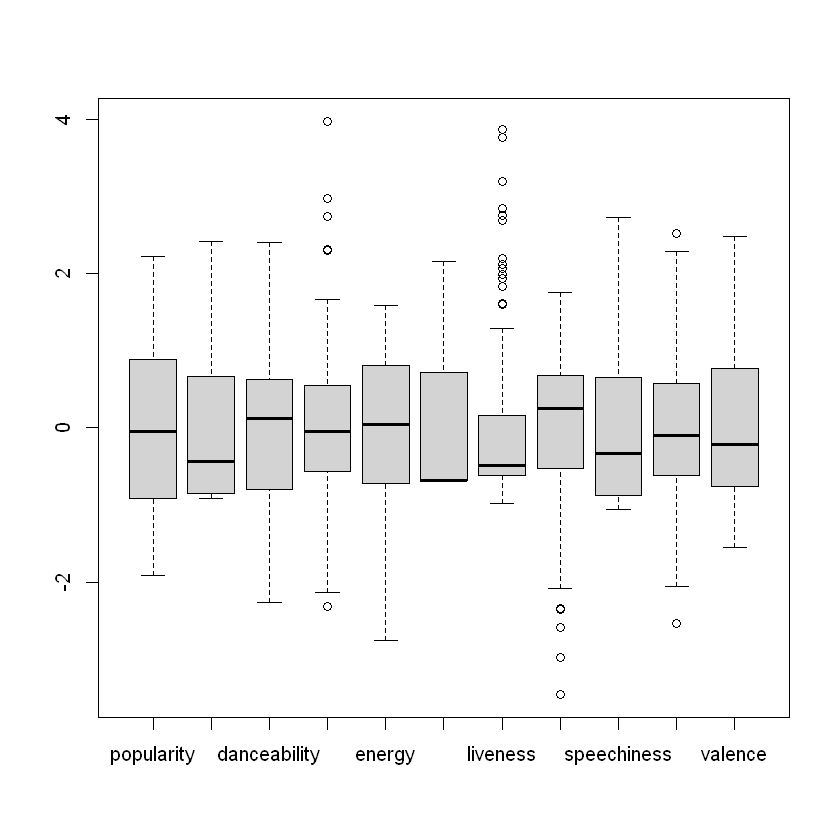

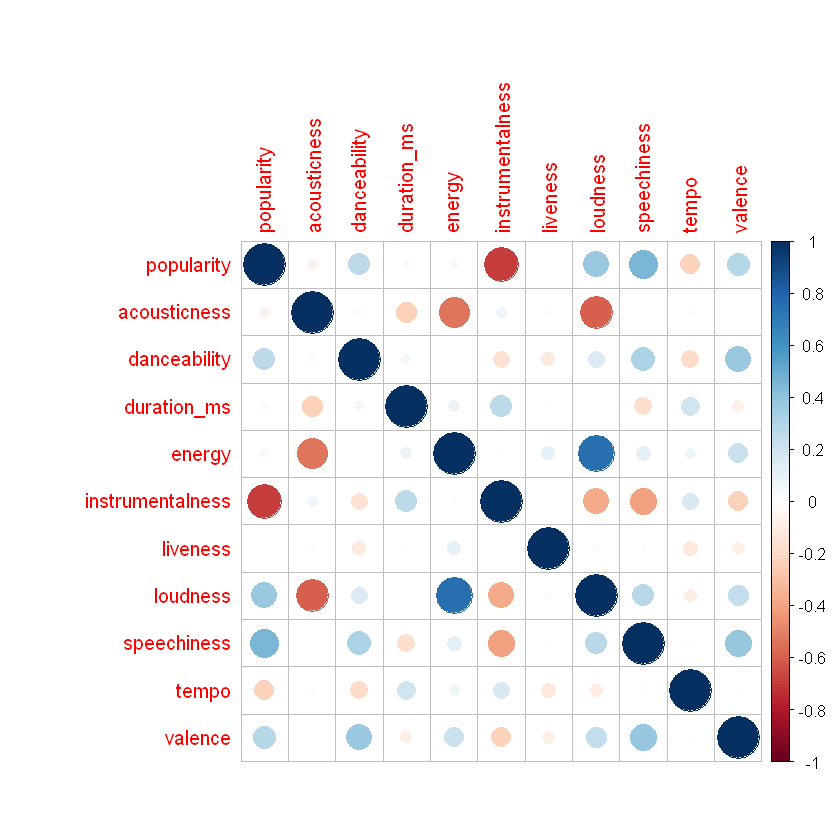

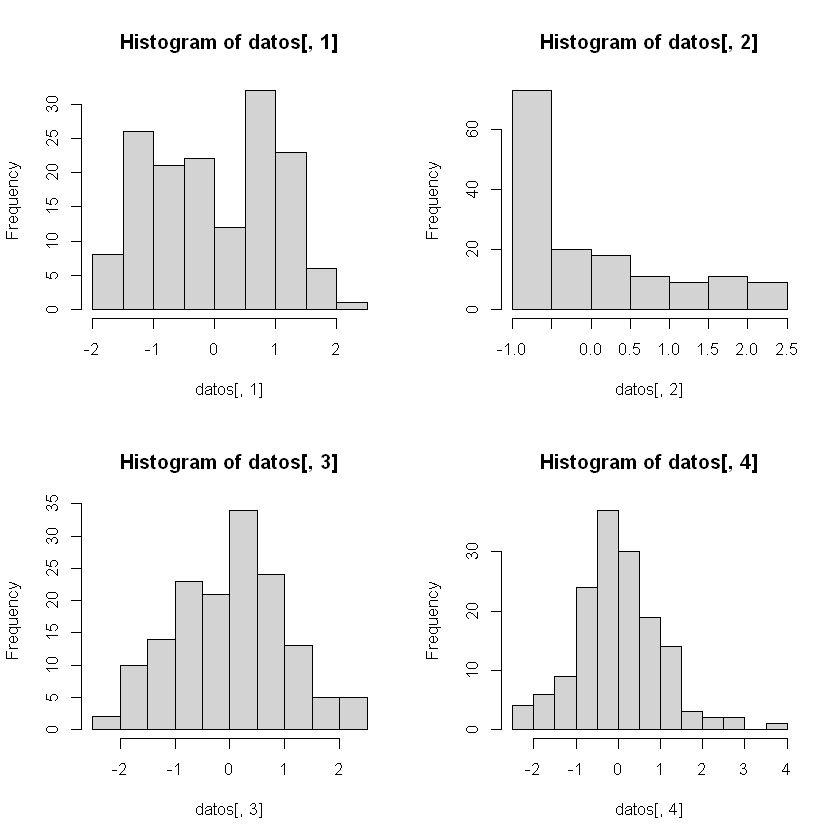

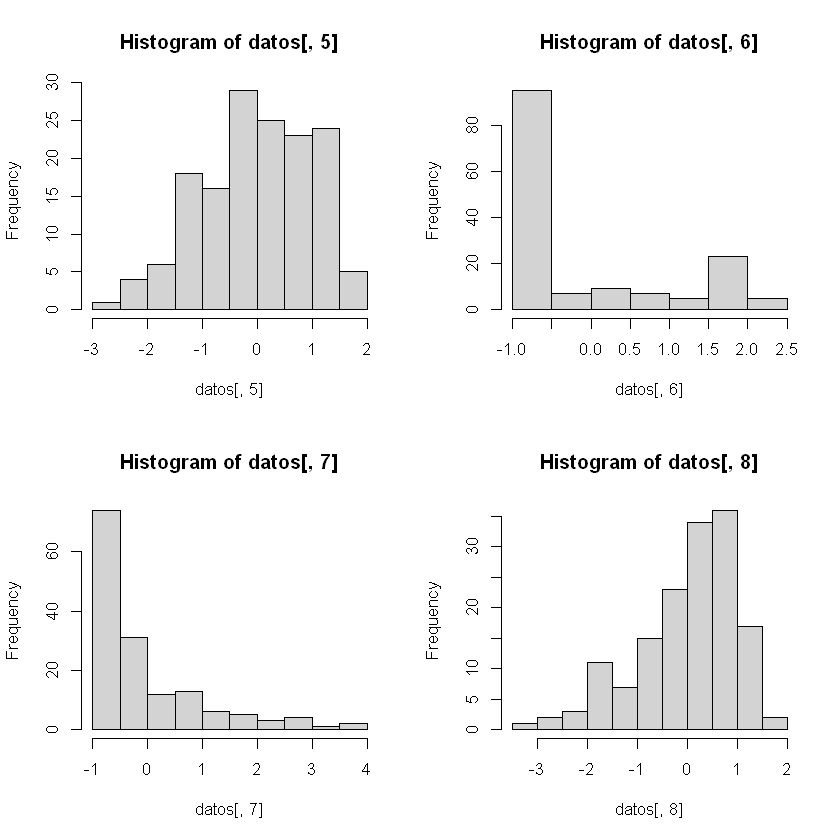

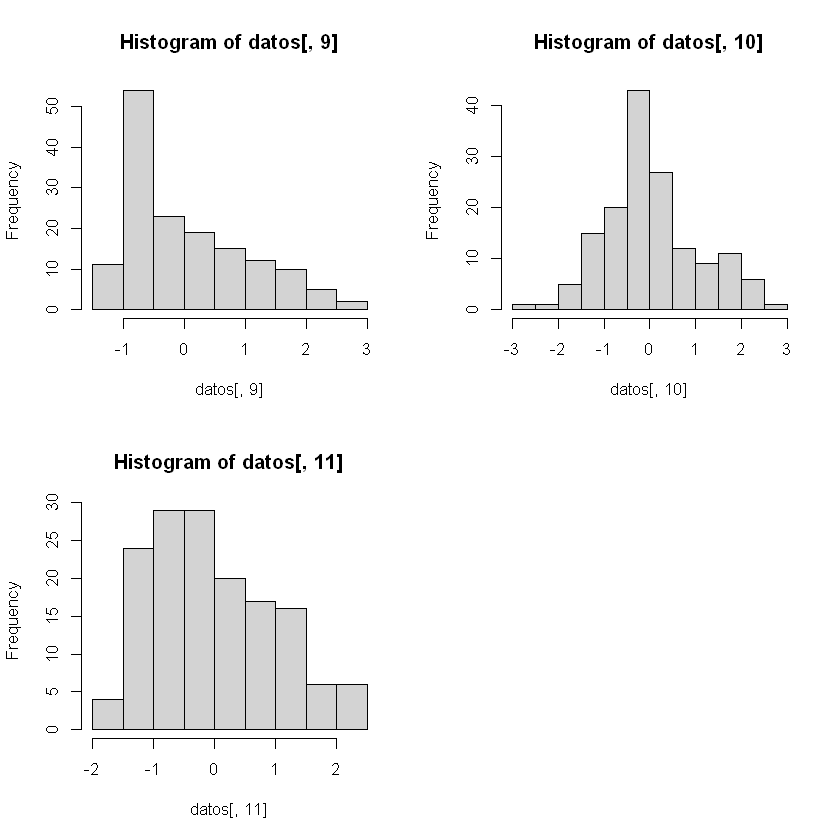

In [75]:
library(corrplot)
boxplot(datos)
corrplot(cor(datos))
par(mfrow=c(2,2))
hist(datos[,1])
hist(datos[,2])
hist(datos[,3])
hist(datos[,4])
hist(datos[,5])
hist(datos[,6])
hist(datos[,7])
hist(datos[,8])
hist(datos[,9])
hist(datos[,10])
hist(datos[,11])

**Respuesta Pregunta 3**

Los datos consideran 11 variables de características de las canciones que debieran permitir discriminar a que género corresponden. De acuerdo al resumen estadístico y los gráficos de caja, la variable "duration_ms" es la que tiene la mayor dispersión y la variable "speechiness" la menor varianza. Debido a la diferencia de escala de "duration_ms" se decide escalar los datos.

En cuanto a las correlaciones, la mayor correlación positiva se presenta entre "loudness" y "energy" y las mayores correlaciones negativas entre "instrumentalness" y "popularity" y entre "loudness" y "acousticness".

Respecto a la hipótesis de normalidad, la inspección visual de los boxplot e histogramas evidencia que todas las variables tienen un comportamiento normal o posiblemente mezcla de normales. 

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.



---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVI (diagonal, equal volume, varying shape) model with 3 components: 

 log-likelihood   n df      BIC       ICL
      -1802.515 149 66 -3935.29 -3941.526

Clustering table:
 1  2  3 
63 45 41 

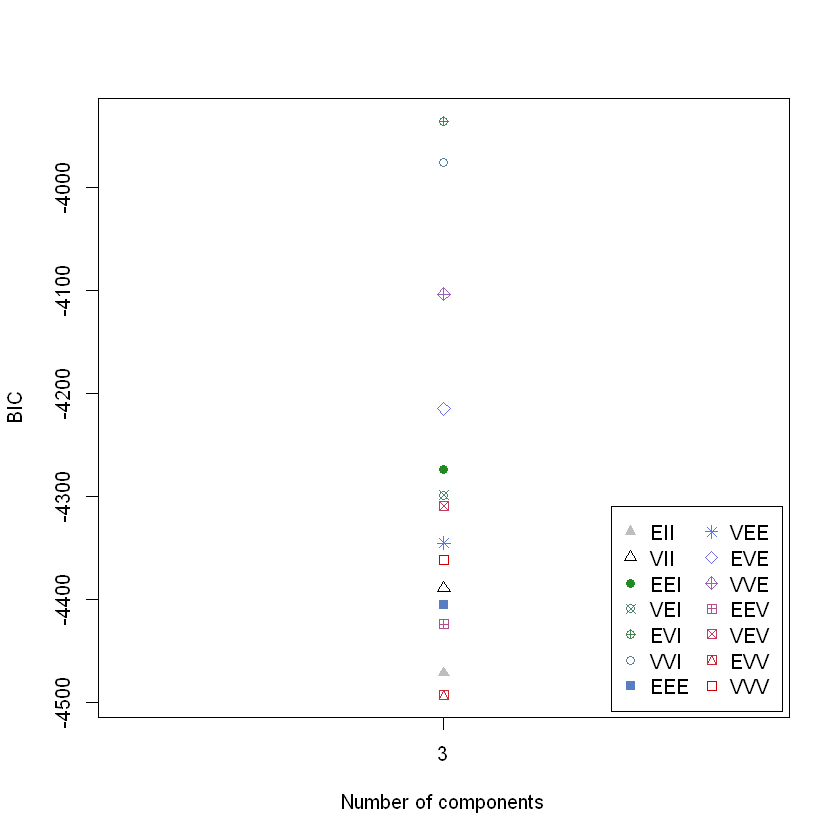

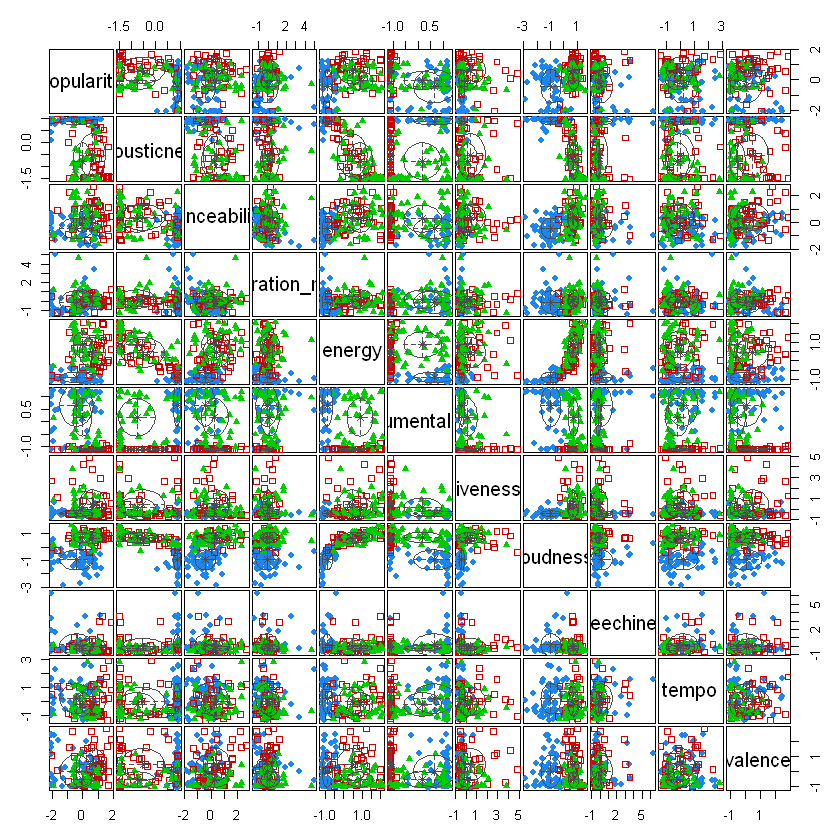

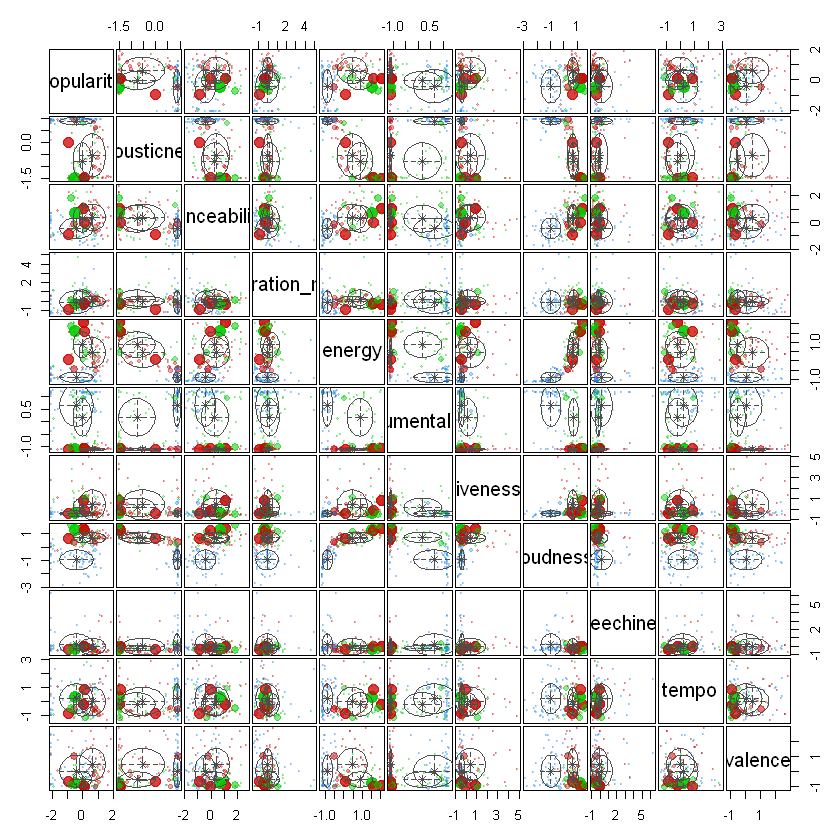

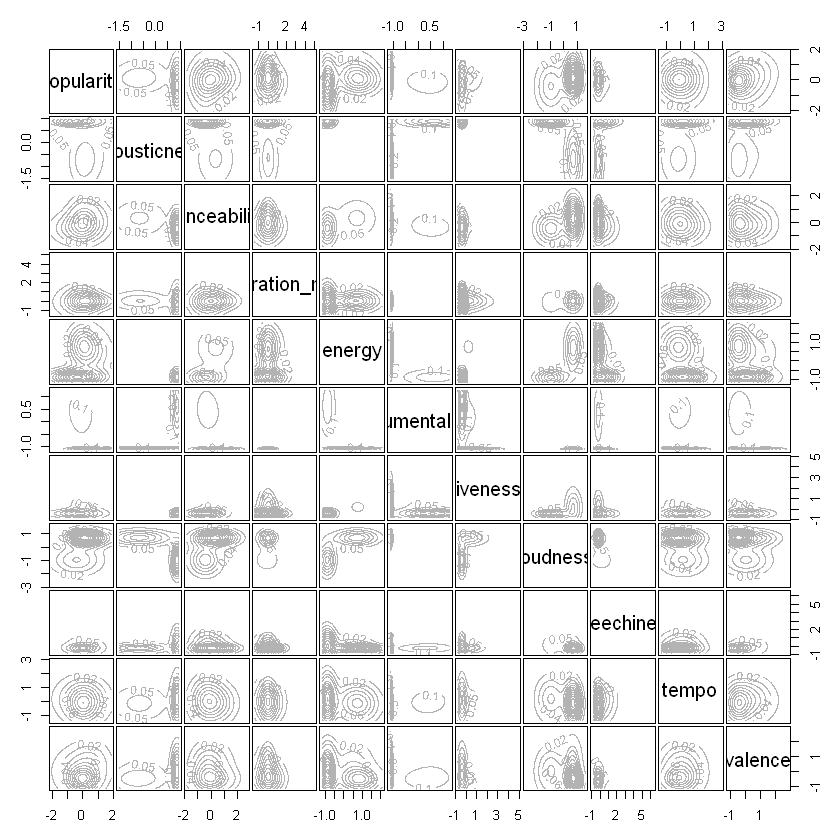

In [7]:
## se realiza inicialmente un análisis del BIC para determinar el número de grupos
library(mclust)
clus <-Mclust(datos,G=3)
summary(clus)
plot(clus)

  [1] 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 [38] 1 1 1 1 2 3 1 1 1 1 1 1 1 1 3 1 1 1 1 2 1 3 1 1 1 1 1 2 1 1 1 1 1 1 3 3 3
 [75] 2 3 3 3 2 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3 3 2 2 3 2
[112] 3 3 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 3
[149] 2


Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.8330064 1.1628680 1.0847838 1.04362230 0.98946194
Proportion of Variance 0.3054466 0.1229329 0.1069778 0.09901341 0.08900318
Cumulative Proportion  0.3054466 0.4283795 0.5353573 0.63437071 0.72337388
                           Comp.6     Comp.7     Comp.8    Comp.9    Comp.10
Standard deviation     0.95582692 0.85735863 0.74688617 0.7167870 0.47077928
Proportion of Variance 0.08305501 0.06682398 0.05071263 0.0467076 0.02014847
Cumulative Proportion  0.80642889 0.87325288 0.92396551 0.9706731 0.99082158
                           Comp.11
Standard deviation     0.317746232
Proportion of Variance 0.009178424
Cumulative Proportion  1.000000000

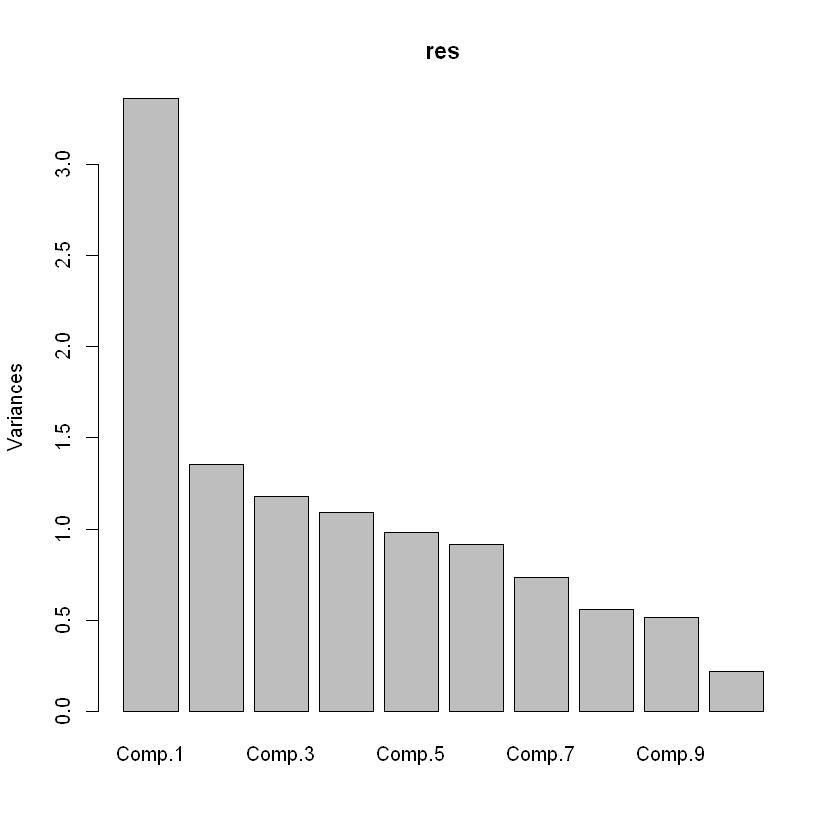

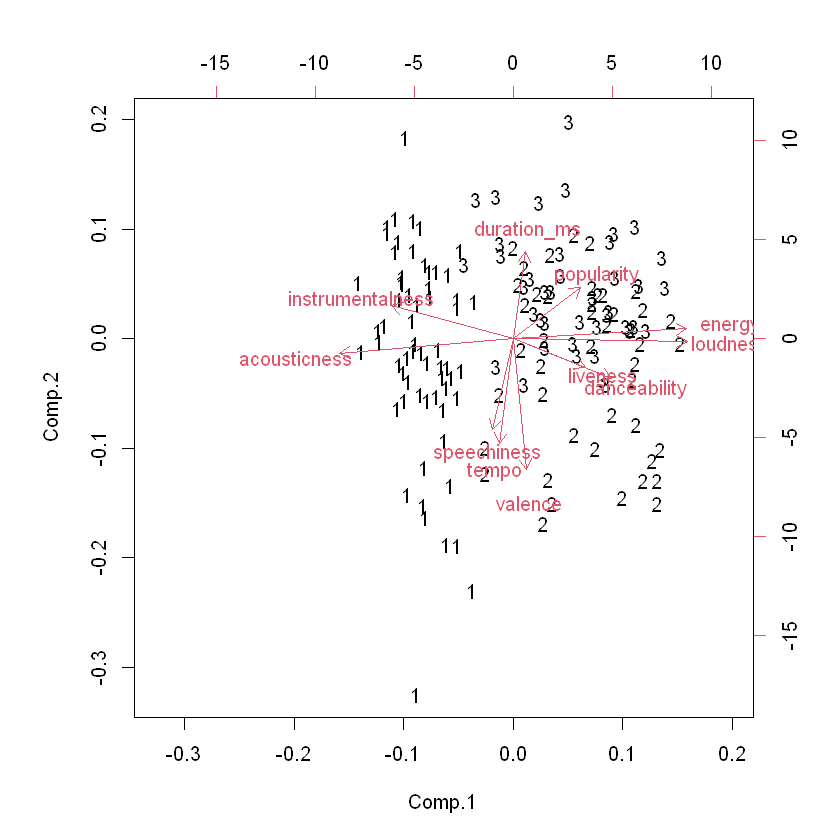

In [9]:
cl <- clus$classification
print(cl)
centers <- t(clus$parameters$mean)
res <- princomp(datos,cor=TRUE)
plot(res)
summary(res)

biplot(res,xlabs=cl)


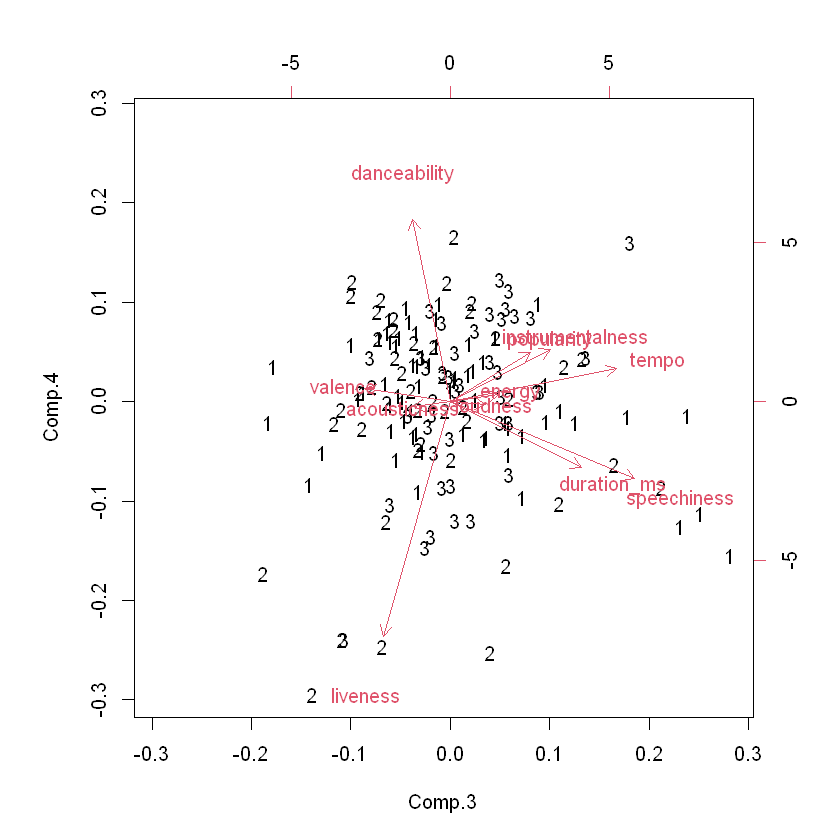

In [10]:
biplot(res,xlabs=cl,choices=3:4)

**Respuesta Pregunta 5**

El primer plano principal representa el 42% de la varianza (30.5% asociada a la primera componente) por lo que no es completamente representativo de los datos. Se puede ver que ambos ejes aportan a distinguir los 3 grupos. El grupo 1 se distingue de los demás grupos por sus mayores valores de "acousticness" y "instrumentalness", mientras que el grupo 2 se caracteriza por mayores valores de "liveness" y ""danceability". Por último el grupo 3 se caracteriza por mayores valores de "popularity" y "duration_ms". 
Se graficó además los datos y variables en el plano del 3er y 4to ejes principales, sin encontrar nuevos elementos de discriminación de los grupos.

In [12]:
## Calculo de medida de calidad del agrupamiento
datos0[datos0[,1]=='Rock',1]<-'D_Rock'
print(table(cl,datos0[,1]))

   
cl  Classical D_Rock Electronic
  1        63      0          0
  2         5     32          8
  3         3      7         31


In [94]:
print(ClusterPurity(cl,datos0[,1]))

[1] 0.8456376


**Respuesta Pregunta 6**
De acuerdo a la tabla de contingencia, las mayores confusiones se encuentran en la discriminación de los géneros Rock y Electronic. Ninguna de las canciones de estos géneros es clasificada como música clásica, pero hay una confusión de 15 canciones entre estos dos géneros (7 piezas de Rock clasificadas como Electronic y 8 piezas de Electronic clasificadas como Rock). Por otra parte 8 piezas de música clásica son mal clasificadas como Rock (5) o Electronic (3).  

El coeficiente de Purity es 0.85 lo cual nos dice que el agrupamiento es de bastante buena calidad.